<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/R/00_pricedata_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주가 데이터 가져오기 (R 버전)

Python Colab 노트북을 R로 변환한 예시입니다. `tidyquant/quantmod/ggplot2`로
미국/한국 주식 데이터를 수집하고 시각화합니다.


## 패키지 설치 (최초 1회)
Colab에서 실행 중이라면 아래 셀을 **한 번만** 실행하세요. 로컬 R 환경이나 RStudio에서도 동일합니다.

In [1]:
options(repos='https://cloud.r-project.org')
pkgs <- c('tidyverse','tidyquant','quantmod','lubridate','ggplot2')
to_install <- pkgs[!pkgs %in% installed.packages()[,'Package']]
if (length(to_install) > 0) install.packages(to_install)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘globals’, ‘listenv’, ‘parallelly’, ‘mvtnorm’, ‘pcaPP’, ‘DEoptimR’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘furrr’, ‘crosstalk’, ‘warp’, ‘BH’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘future’, ‘quadprog’, ‘pyinit’, ‘rrcov’, ‘robustbase’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘lazyeval’, ‘PerformanceAnalytics’, ‘RobStatTM’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’, ‘zoo’




In [2]:
library(tidyverse)
library(tidyquant)
library(quantmod)
library(lubridate)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyquant packages ─────────────────────── tidyquant 1.0.11 ──
✔ PerformanceAnalytics 2.0.8      ✔ TTR                  0.24.4
✔ quantmod             0.4.28     ✔ xts                  0.14.1
── Conflicts ────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()        

## 1) 미국/한국 티커 예시 및 기간 설정

In [3]:
# 미국 티커
tickers_us <- c('TSLA','AAPL','GOOGL','AMZN','MSFT')

# 한국 야후 포맷 예시 (.KS=코스피, .KQ=코스닥)
# 삼성전자(005930.KS), SK하이닉스(000660.KS), NAVER(035420.KS)
tickers_kr <- c('005930.KS','000660.KS','035420.KS')

start_date <- as_date('2022-01-01')
end_date   <- as_date('2024-01-01')


## 2) 단일 종목 가져오기 (yfinance 대체: `tq_get`)

In [4]:
# 테슬라 TSLA
tsla <- tq_get('TSLA', from = start_date, to = end_date, get = 'stock.prices')
head(tsla)

# 애플 AAPL
aapl <- tq_get('AAPL', from = start_date, to = end_date, get = 'stock.prices')
head(aapl)


symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSLA,2022-01-03,382.5833,400.3567,378.6800,399.9267,103931400,399.9267
TSLA,2022-01-04,396.5167,402.6667,374.3500,383.1967,100248300,383.1967
TSLA,2022-01-05,382.2167,390.1133,360.3367,362.7067,80119800,362.7067
TSLA,2022-01-06,359.0000,362.6667,340.1667,354.9000,90336600,354.9000
TSLA,2022-01-07,360.1233,360.3100,336.6667,342.3200,84164700,342.3200
TSLA,2022-01-10,333.3333,353.0333,326.6667,352.7067,91815000,352.7067


symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2022-01-03,177.83,182.88,177.71,182.01,104487900,178.4431
AAPL,2022-01-04,182.63,182.94,179.12,179.70,99310400,176.1784
AAPL,2022-01-05,179.61,180.17,174.64,174.92,94537600,171.4921
AAPL,2022-01-06,172.70,175.30,171.64,172.00,96904000,168.6293
AAPL,2022-01-07,172.89,174.14,171.03,172.17,86709100,168.7960
AAPL,2022-01-10,169.08,172.50,168.17,172.19,106765600,168.8156


## 3) 여러 종목 동시 가져오기 (미국/한국)

In [5]:
multi_us <- tq_get(tickers_us, from = start_date, to = end_date, get = 'stock.prices')
head(multi_us)

# 2018년 한국 종목 예시 (FinanceDataReader 대체)
multi_kr <- tq_get(tickers_kr, from = as_date('2018-01-01'), to = as_date('2018-03-30'), get = 'stock.prices')
head(multi_kr)


symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSLA,2022-01-03,382.5833,400.3567,378.6800,399.9267,103931400,399.9267
TSLA,2022-01-04,396.5167,402.6667,374.3500,383.1967,100248300,383.1967
TSLA,2022-01-05,382.2167,390.1133,360.3367,362.7067,80119800,362.7067
TSLA,2022-01-06,359.0000,362.6667,340.1667,354.9000,90336600,354.9000
TSLA,2022-01-07,360.1233,360.3100,336.6667,342.3200,84164700,342.3200
TSLA,2022-01-10,333.3333,353.0333,326.6667,352.7067,91815000,352.7067


symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
005930.KS,2018-01-02,51380,51400,50780,51020,8474250,41677.14
005930.KS,2018-01-03,52540,52560,51420,51620,10013500,42167.26
005930.KS,2018-01-04,52120,52180,50640,51080,11695450,41726.15
005930.KS,2018-01-05,51300,52120,51200,52120,9481150,42575.71
005930.KS,2018-01-08,52400,52520,51500,52020,8383650,42494.01
005930.KS,2018-01-09,51460,51720,49980,50400,18013600,41170.67


## 4) 시각화 (ggplot2)

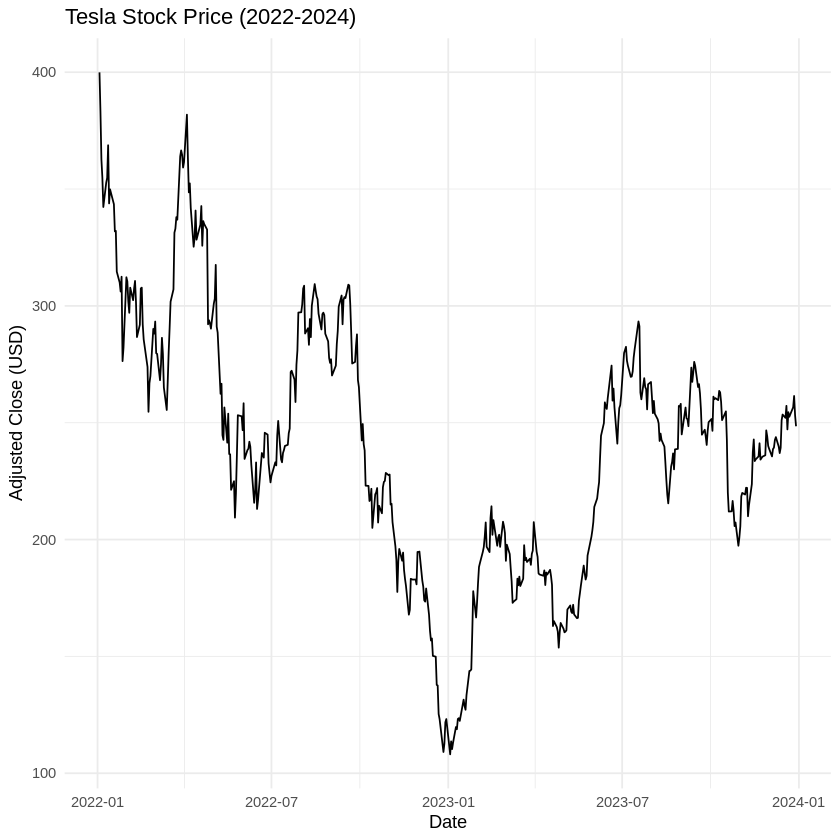

In [6]:
# TSLA 종가 라인
ggplot(tsla, aes(x = date, y = adjusted)) +
  geom_line() +
  labs(title = 'Tesla Stock Price (2022-2024)', x='Date', y='Adjusted Close (USD)') +
  theme_minimal()


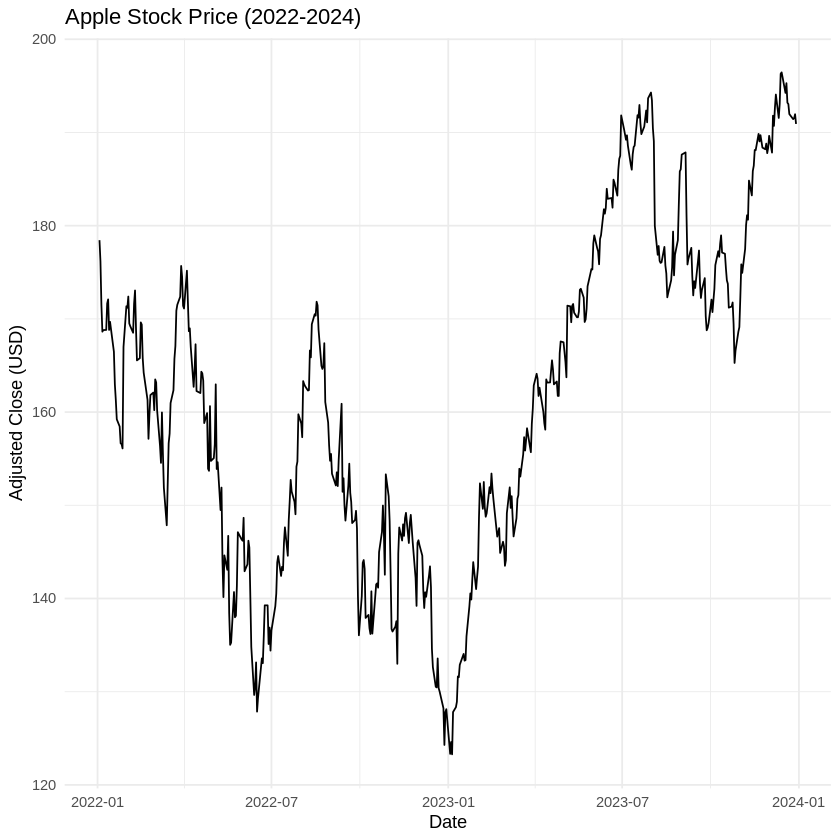

In [7]:
# AAPL 종가 라인
ggplot(aapl, aes(x = date, y = adjusted)) +
  geom_line() +
  labs(title = 'Apple Stock Price (2022-2024)', x='Date', y='Adjusted Close (USD)') +
  theme_minimal()


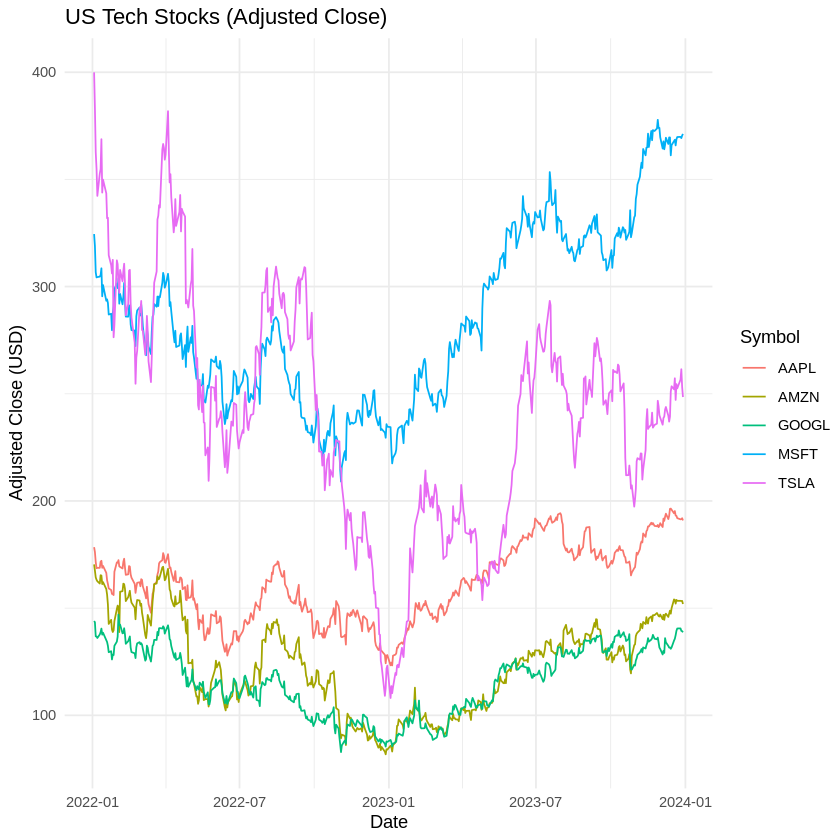

In [8]:
# 미국 5개 종목 비교
multi_us %>%
  group_by(symbol) %>%
  arrange(date, .by_group = TRUE) %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line() +
  labs(title = 'US Tech Stocks (Adjusted Close)', x='Date', y='Adjusted Close (USD)', color='Symbol') +
  theme_minimal()


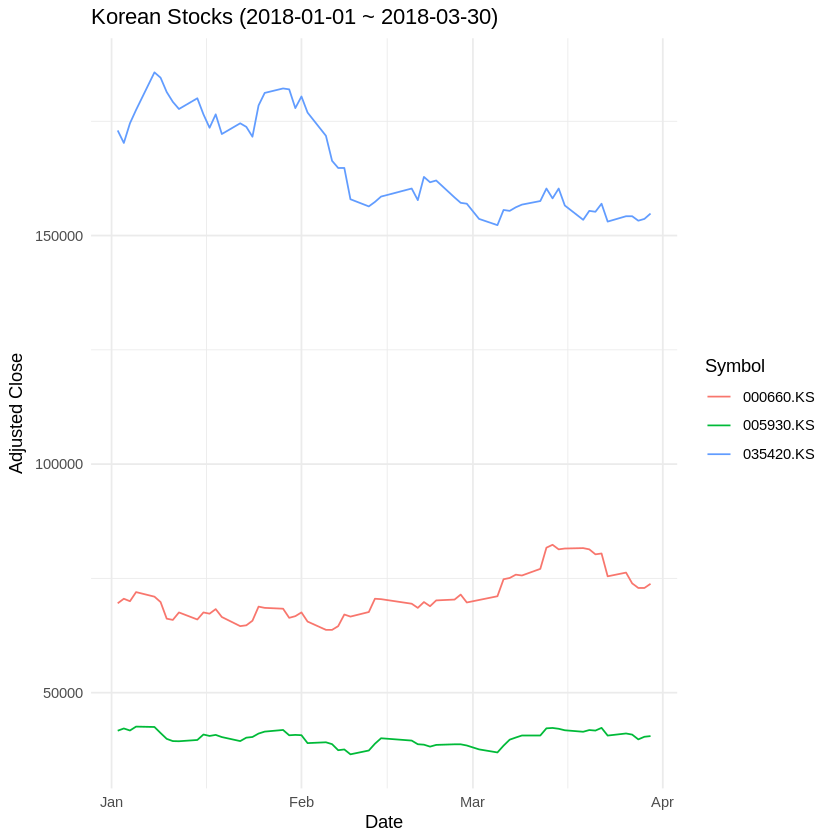

In [9]:
# 한국 종목 (2018 예시)
ggplot(multi_kr, aes(x = date, y = adjusted, color = symbol)) +
  geom_line() +
  labs(title = 'Korean Stocks (2018-01-01 ~ 2018-03-30)', x='Date', y='Adjusted Close', color='Symbol') +
  theme_minimal()


## (선택) quantmod 사용 예시
`getSymbols()`는 `xts` 객체를 반환합니다. 간단 그래프를 그릴 때 유용합니다.

In [10]:
# getSymbols('TSLA', from = start_date, to = end_date, src = 'yahoo')
# chart_Series(TSLA)

# 한국 예시
# getSymbols('005930.KS', src = 'yahoo')
# chart_Series(`005930.KS`)
